Success: Dataset Loaded!

--- Analysis: Days: Registration to First Watch ---
Mean (Average):   3.42
Median (Middle):  0.00
Mode (Most Freq): 0.00
>> SKEW: Right-Skewed (Positive). Outliers are pulling the average UP.

--- Analysis: Days: First Watch to Purchase ---
Mean (Average):   26.25
Median (Middle):  1.00
Mode (Most Freq): 0.00
>> SKEW: Right-Skewed (Positive). Outliers are pulling the average UP.


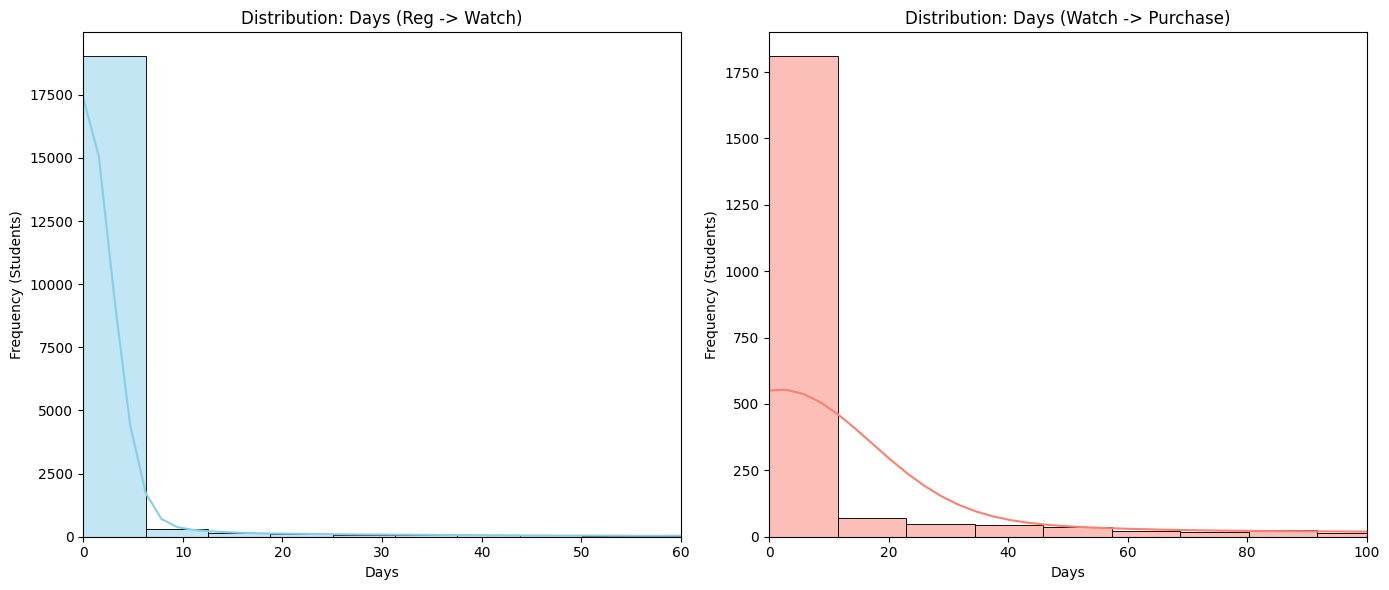

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
# Make sure the file name matches exactly what you uploaded
df = pd.read_csv('query_results.csv')
print("Success: Dataset Loaded!")

# 2. Define a function to calculate Mean, Median, Mode, and Skew
def analyze_distribution(column_name, metric_title):
    print(f"\n--- Analysis: {metric_title} ---")

    # Check if column exists to avoid KeyError
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found. Available columns: {df.columns.tolist()}")
        return

    # Drop NULL values for calculation
    clean_data = df[column_name].dropna()

    mean_val = clean_data.mean()
    median_val = clean_data.median()
    # Mode returns a Series, we take the first one
    mode_val = clean_data.mode()[0]

    print(f"Mean (Average):   {mean_val:.2f}")
    print(f"Median (Middle):  {median_val:.2f}")
    print(f"Mode (Most Freq): {mode_val:.2f}")

    # Interpret Skew
    if mean_val > median_val:
        print(">> SKEW: Right-Skewed (Positive). Outliers are pulling the average UP.")
    elif mean_val < median_val:
        print(">> SKEW: Left-Skewed (Negative). Outliers are pulling the average DOWN.")
    else:
        print(">> SKEW: Symmetrical (Normal Distribution).")

# 3. Run Analysis
# FIX: Use 'days_diff_reg_watch' instead of 'days_diff_reg_watched'
analyze_distribution('days_diff_reg_watch', 'Days: Registration to First Watch')
analyze_distribution('days_diff_watch_purch', 'Days: First Watch to Purchase')

# 4. Create Visualizations (Histograms)
plt.figure(figsize=(14, 6))

# Graph 1: Reg -> Watch
plt.subplot(1, 2, 1)
# FIX: Use 'days_diff_reg_watch'
sns.histplot(df['days_diff_reg_watch'], kde=True, bins=50, color='skyblue')
plt.title('Distribution: Days (Reg -> Watch)')
plt.xlabel('Days')
plt.ylabel('Frequency (Students)')
plt.xlim(0, 60)

# Graph 2: Watch -> Purchase
plt.subplot(1, 2, 2)
sns.histplot(df['days_diff_watch_purch'].dropna(), kde=True, bins=50, color='salmon')
plt.title('Distribution: Days (Watch -> Purchase)')
plt.xlabel('Days')
plt.ylabel('Frequency (Students)')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()